<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparation</a></span><ul class="toc-item"><li><span><a href="#Importing-and-installing-the-necessary-libraries" data-toc-modified-id="Importing-and-installing-the-necessary-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing and installing the necessary libraries</a></span></li><li><span><a href="#Saving-the-source-data-to-the-data-variable" data-toc-modified-id="Saving-the-source-data-to-the-data-variable-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Saving the source data to the data variable</a></span></li><li><span><a href="#Let's-check-the-class-balance" data-toc-modified-id="Let's-check-the-class-balance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Let's check the class balance</a></span></li><li><span><a href="#Creating-a-function-for-cleaning-and-lemmatizing-texts" data-toc-modified-id="Creating-a-function-for-cleaning-and-lemmatizing-texts-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating a function for cleaning and lemmatizing texts</a></span></li><li><span><a href="#We-apply-the-cleaning-and-lemmatization-function-to-the-text-column-and-save-it-in-lemmatized_text" data-toc-modified-id="We-apply-the-cleaning-and-lemmatization-function-to-the-text-column-and-save-it-in-lemmatized_text-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>We apply the cleaning and lemmatization function to the text column and save it in lemmatized_text</a></span></li><li><span><a href="#I-think-that-there-is-nothing-left-of-some-of-the-texts.-Let's-check-and-delete-such-values" data-toc-modified-id="I-think-that-there-is-nothing-left-of-some-of-the-texts.-Let's-check-and-delete-such-values-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>I think that there is nothing left of some of the texts. Let's check and delete such values</a></span></li><li><span><a href="#Let's-divide-the-sample-into-a-training-and-a-test-sample.-Let's-take-20%-of-the-data-for-the-test" data-toc-modified-id="Let's-divide-the-sample-into-a-training-and-a-test-sample.-Let's-take-20%-of-the-data-for-the-test-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Let's divide the sample into a training and a test sample. Let's take 20% of the data for the test</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>TF-IDF</a></span></li></ul></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model training</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#We-train-the-model-to-check-the-threshold" data-toc-modified-id="We-train-the-model-to-check-the-threshold-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>We train the model to check the threshold</a></span></li></ul></li><li><span><a href="#The-decision-tree-model.-Let's-search-for-the-best-model-using-the-optuna-random-search" data-toc-modified-id="The-decision-tree-model.-Let's-search-for-the-best-model-using-the-optuna-random-search-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The decision tree model. Let's search for the best model using the optuna random search</a></span><ul class="toc-item"><li><span><a href="#Changing-threshold" data-toc-modified-id="Changing-threshold-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Changing threshold</a></span></li></ul></li><li><span><a href="#The-catboost-model" data-toc-modified-id="The-catboost-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The catboost model</a></span><ul class="toc-item"><li><span><a href="#Changing-threshold" data-toc-modified-id="Changing-threshold-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Changing threshold</a></span></li></ul></li><li><span><a href="#Checking-the-catboost-model-on-a-test-sample" data-toc-modified-id="Checking-the-catboost-model-on-a-test-sample-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Checking the catboost model on a test sample</a></span></li></ul></li><li><span><a href="#Let's-infer-the-importance-of-each-word" data-toc-modified-id="Let's-infer-the-importance-of-each-word-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's infer the importance of each word</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# A project for Wikishop

An online store launches a new service. Now users can edit and add product descriptions, just like in wiki communities. That is, clients offer their edits and comment on the changes of others. The store needs a tool that will search for toxic comments and send them for moderation. 

Train the model to classify comments into positive and negative ones. You have at your disposal a data set with markup on the toxicity of edits.

Build a model with the value of the quality metric *F1* at least 0.75. 

**Instructions for the implementation of the project**

1. Download and prepare the data.
2. Train different models. 
3. Draw conclusions.

It is not necessary to use *BERT* to complete the project, but you can try.

**Description of the data**

The *text* column in it contains the text of the comment, and *toxic* is the target attribute.

## Preparation

### Importing and installing the necessary libraries

Let's install the optuna library

In [64]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Importing the necessary libraries

In [65]:
import optuna
import nltk
import re
import catboost
import pandas as pd
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier

#from pymystem3 import Mystem
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from numpy import arange
from numpy import argmax
from scipy.stats import randint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

### Saving the source data to the data variable

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


There is no missing values

### Let's check the class balance

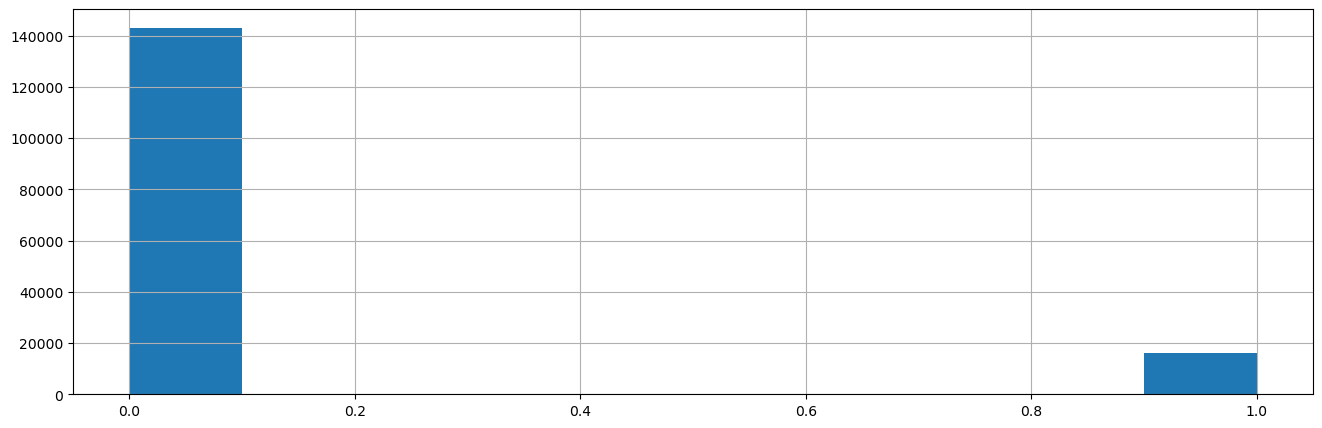

In [9]:
data['toxic'].hist(figsize=(16, 5))
plt.show()

### Creating a function for cleaning and lemmatizing texts

Adding a function to determine the part of speech

In [10]:
def get_wordnet_pos(word):
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [11]:
def clear_and_lemmatize_text(text):
    text = text.lower()
    # removing non-alphabetic characters
    text = re.sub(r"[^a-zA-Z ]", ' ', text)
    # tokenizing words
    text = nltk.word_tokenize(text, language="english")
    # lemmatizing words
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text]
    
    # replace 4 or more consecutive identical letters with one letter
    text = [re.sub(r'(.)\1{2,}', r'\1', word) for word in text]
    
    # connecting the words
    new_text = " ".join(text)
    return new_text

Checking the function operation

In [12]:
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])


print(df_my['text'].apply(clear_and_lemmatize_text))

0    the strip bat be hang on their foot for best
1       you should be ashamed of yourself go work
Name: text, dtype: object


It works

### We apply the cleaning and lemmatization function to the text column and save it in lemmatized_text

In [13]:
%%time
data['lemmatized_text'] = data['text'].apply(clear_and_lemmatize_text)

Wall time: 41min 20s


In [14]:
data.head()

,text,toxic,lemmatized_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not try to edit war it s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


### I think that there is nothing left of some of the texts. Let's check and delete such values

In [15]:
data[data['lemmatized_text'] == '']

,text,toxic,lemmatized_text
4475,1993\n\n1994\n\n1995\n\n1996\n\n1997\n\n1998\n...,0,
6293,193.61.111.53 15:00,0,
10206,"64.86.141.133""",0,
17297,~ \n\n68.193.147.157,0,
38792,"88.104.31.21""",0,
52393,"14:53,",0,
53740,92.24.199.233|92.24.199.233]],0,
61711,"""\n\n 199.209.144.211 """,0,
82619,"""\n '''''' 2010/2013 """,0,
119123,"""""""",1,


In [16]:
data = data[data['lemmatized_text'] != '']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159281 entries, 0 to 159450
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   text             159281 non-null  object
 1   toxic            159281 non-null  int64 
 2   lemmatized_text  159281 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [18]:
data = data.dropna()

### Let's divide the sample into a training and a test sample. Let's take 20% of the data for the test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data['lemmatized_text'],                                             
    data['toxic'],                                           
    test_size=0.2,                                             
    stratify=data['toxic'],
    random_state=17                                  
        )

In [20]:
X_train.shape

(127424,)

In [21]:
X_test.shape

(31857,)

In [22]:
y_train.shape

(127424,)

In [23]:
y_test.shape

(31857,)

### TF-IDF

Setting a set of stop words from the English language

In [24]:
stop_words = set(stopwords.words('english'))

Creating a counter by specifying stop words in it

In [25]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

## Model training

### Logistic regression

Setting the class of the logistic regression model

In [26]:
model_lr = LogisticRegression(random_state=17, )

In [27]:
pipeline_lr = Pipeline([
    ('tfidf', count_tf_idf),
    ('classifier', model_lr)
])

Using cross-validation, we will calculate the F1 metric

In [28]:
f1_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='f1')
f1_scores_lr

C:\Users\gogad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gogad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.72585963, 0.72491145, 0.71649607, 0.73505466, 0.72922502])

In [29]:
f1_score_mean_lr = f1_scores_lr.mean()
f1_score_mean_lr

0.7263093688722553

#### We train the model to check the threshold

In [30]:
model_lr.fit(count_tf_idf.fit_transform(X_train.values), y_train)

C:\Users\gogad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=17)

Predicting probabilities on a training sample

In [31]:
y_pred_lr_train = model_lr.predict_proba(count_tf_idf.fit_transform(X_train.values))[:, 1]
y_pred_lr_train

array([0.00390236, 0.0049882 , 0.0250678 , ..., 0.01725832, 0.01761129,
       0.01264495])

Setting a function to calculate the optimal threshold

In [32]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

Calculating the optimal threshold

In [33]:
thresholds = arange(0, 1, 0.001)
# we calculate f1 for each threshold value with an interval of 0.001
scores = [f1_score(y_train, to_labels(y_pred_lr_train, t)) for t in thresholds]
# we output the optimal threshold and metric
optimal_threshold_lr = thresholds[argmax(scores)]
print('Порог=%.3f, F1=%.5f' % (optimal_threshold_lr, scores[argmax(scores)]))

Порог=0.231, F1=0.83239


### The decision tree model. Let's search for the best model using the optuna random search

In [34]:
def objective(trial):
    # defining the parameters for the search
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # creating a decision tree class
    dt_classifier = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state = 17
    )
    
    # adding a pipeline
    pipeline_dt = Pipeline([
    ('tfidf', count_tf_idf),
    ('classifier', dt_classifier)
    ])
    
    
    # we use cross-validation to find a model based on the best metric
    score = cross_val_score(pipeline_dt, X_train, y_train, cv=5, scoring='f1').mean()

    return score

We are searching for the best model

In [35]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-05-20 20:41:13,288] A new study created in memory with name: no-name-eebcfefc-c8a6-4840-99fb-5740ad1baafb
[I 2024-05-20 20:42:03,910] Trial 0 finished with value: 0.6512617157734863 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6512617157734863.
[I 2024-05-20 20:42:31,147] Trial 1 finished with value: 0.5719814266754654 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6512617157734863.
[I 2024-05-20 20:43:00,160] Trial 2 finished with value: 0.600227646130312 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6512617157734863.
[I 2024-05-20 20:43:29,911] Trial 3 finished with value: 0.6026877234033525 and parameters: {'criterion': 'entropy', 'splitter': 'random

Let's show the hyperparameters of the best model

In [36]:
study.best_params

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': 28,
 'min_samples_split': 8,
 'min_samples_leaf': 2}

Let's show the metric of the best model

In [37]:
study.best_value

0.6642691927819759

The metric is lower than that of logistic regression

#### Changing threshold

In [38]:
model_dt = DecisionTreeClassifier(**study.best_params, random_state=17)

In [39]:
model_dt.fit(count_tf_idf.fit_transform(X_train.values), y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=2,
                       min_samples_split=8, random_state=17)

Predicting probabilities on a training sample

In [40]:
y_pred_dt_train = model_dt.predict_proba(count_tf_idf.fit_transform(X_train.values))[:, 1]
y_pred_dt_train

array([0.03050524, 0.01005806, 0.01005806, ..., 0.06123371, 0.06123371,
       0.06123371])

Calculating the optimal threshold

In [41]:
thresholds = arange(0, 1, 0.001)
# we calculate f1 for each threshold value with an interval of 0.001
scores = [f1_score(y_train, to_labels(y_pred_dt_train, t)) for t in thresholds]
# we output the optimal threshold and metric
optimal_threshold_dt = thresholds[argmax(scores)]
print('Threshold=%.3f, F1=%.5f' % (optimal_threshold_dt, scores[argmax(scores)]))

Threshold=0.369, F1=0.74915


The metric has grown due to a change in the threshold, but still lower than that of the logistic regression

### The catboost model

Creating a function for the best model search

In [42]:
def objective_cb(trial):
    # defining the parameters for the search
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 5, 255),
        'thread_count': -1,
        'verbose': False
    }

    # creating the CatBoostClassifier class
    catboost_classifier = CatBoostClassifier(**params)
    
    # creating pipeline
    pipeline_cb = Pipeline([
    ('tfidf', count_tf_idf),
    ('classifier', catboost_classifier)
    ])

    # using cross-validation to find a model based on the best metric
    score = cross_val_score(pipeline_cb, X_train, y_train, cv=5, scoring='f1').mean()

    return score

Searching for the best model

Showing the hyperparameters of the best model

Let's show the metric of the best model

Slightly adjusting the number of iterations and learning_rate

In [44]:
params_best_model_cb = {
    'iterations': 250,
    'depth': 9, 
    'learning_rate': 0.26, 
    'l2_leaf_reg': 2.41915704299194, 
    'border_count': 26
}

Creating a catboost model with the received parameters

In [45]:
model_cb = CatBoostClassifier(**params_best_model_cb, random_state=17)

Let's evaluate the quality of the model using cross-validation

In [46]:
%%time
score_cb = cross_val_score(model_cb, count_tf_idf.fit_transform(X_train.values), y_train, cv=5, scoring='f1').mean()
score_cb

0:	learn: 0.4610468	total: 1.25s	remaining: 5m 12s
1:	learn: 0.3449685	total: 2.24s	remaining: 4m 37s
2:	learn: 0.2812145	total: 3.2s	remaining: 4m 23s
3:	learn: 0.2488456	total: 4.18s	remaining: 4m 17s
4:	learn: 0.2309134	total: 5.15s	remaining: 4m 12s
5:	learn: 0.2191743	total: 6.09s	remaining: 4m 7s
6:	learn: 0.2114219	total: 7s	remaining: 4m 3s
7:	learn: 0.2060060	total: 7.94s	remaining: 4m
8:	learn: 0.2016341	total: 8.87s	remaining: 3m 57s
9:	learn: 0.1980894	total: 9.79s	remaining: 3m 54s
10:	learn: 0.1933950	total: 10.7s	remaining: 3m 52s
11:	learn: 0.1908327	total: 11.6s	remaining: 3m 50s
12:	learn: 0.1880698	total: 12.5s	remaining: 3m 48s
13:	learn: 0.1860096	total: 13.5s	remaining: 3m 47s
14:	learn: 0.1831047	total: 14.4s	remaining: 3m 45s
15:	learn: 0.1808527	total: 15.3s	remaining: 3m 43s
16:	learn: 0.1790095	total: 16.2s	remaining: 3m 42s
17:	learn: 0.1769222	total: 17.2s	remaining: 3m 41s
18:	learn: 0.1748864	total: 18.1s	remaining: 3m 40s
19:	learn: 0.1725526	total: 19s	

157:	learn: 0.1082107	total: 2m 37s	remaining: 1m 31s
158:	learn: 0.1080192	total: 2m 38s	remaining: 1m 30s
159:	learn: 0.1077422	total: 2m 39s	remaining: 1m 29s
160:	learn: 0.1074792	total: 2m 40s	remaining: 1m 28s
161:	learn: 0.1073400	total: 2m 41s	remaining: 1m 27s
162:	learn: 0.1071224	total: 2m 42s	remaining: 1m 26s
163:	learn: 0.1070236	total: 2m 43s	remaining: 1m 25s
164:	learn: 0.1067691	total: 2m 44s	remaining: 1m 24s
165:	learn: 0.1066744	total: 2m 45s	remaining: 1m 23s
166:	learn: 0.1065896	total: 2m 46s	remaining: 1m 22s
167:	learn: 0.1063242	total: 2m 47s	remaining: 1m 21s
168:	learn: 0.1061088	total: 2m 48s	remaining: 1m 20s
169:	learn: 0.1059593	total: 2m 49s	remaining: 1m 19s
170:	learn: 0.1058443	total: 2m 50s	remaining: 1m 18s
171:	learn: 0.1056835	total: 2m 51s	remaining: 1m 17s
172:	learn: 0.1055125	total: 2m 52s	remaining: 1m 16s
173:	learn: 0.1052995	total: 2m 53s	remaining: 1m 15s
174:	learn: 0.1052076	total: 2m 54s	remaining: 1m 14s
175:	learn: 0.1049537	total:

66:	learn: 0.1343304	total: 1m 8s	remaining: 3m 6s
67:	learn: 0.1339027	total: 1m 9s	remaining: 3m 5s
68:	learn: 0.1336168	total: 1m 10s	remaining: 3m 4s
69:	learn: 0.1333576	total: 1m 11s	remaining: 3m 3s
70:	learn: 0.1329468	total: 1m 12s	remaining: 3m 2s
71:	learn: 0.1324098	total: 1m 13s	remaining: 3m 1s
72:	learn: 0.1321576	total: 1m 14s	remaining: 3m
73:	learn: 0.1315425	total: 1m 15s	remaining: 2m 58s
74:	learn: 0.1312127	total: 1m 16s	remaining: 2m 57s
75:	learn: 0.1307832	total: 1m 17s	remaining: 2m 56s
76:	learn: 0.1303710	total: 1m 18s	remaining: 2m 55s
77:	learn: 0.1300078	total: 1m 19s	remaining: 2m 54s
78:	learn: 0.1295629	total: 1m 20s	remaining: 2m 53s
79:	learn: 0.1291062	total: 1m 21s	remaining: 2m 52s
80:	learn: 0.1287836	total: 1m 22s	remaining: 2m 51s
81:	learn: 0.1283961	total: 1m 23s	remaining: 2m 50s
82:	learn: 0.1279941	total: 1m 24s	remaining: 2m 49s
83:	learn: 0.1275336	total: 1m 25s	remaining: 2m 49s
84:	learn: 0.1270182	total: 1m 26s	remaining: 2m 48s
85:	l

221:	learn: 0.0976962	total: 3m 46s	remaining: 28.5s
222:	learn: 0.0975076	total: 3m 47s	remaining: 27.5s
223:	learn: 0.0973818	total: 3m 48s	remaining: 26.5s
224:	learn: 0.0972724	total: 3m 49s	remaining: 25.5s
225:	learn: 0.0971027	total: 3m 50s	remaining: 24.5s
226:	learn: 0.0970227	total: 3m 51s	remaining: 23.5s
227:	learn: 0.0968010	total: 3m 52s	remaining: 22.4s
228:	learn: 0.0967315	total: 3m 53s	remaining: 21.4s
229:	learn: 0.0964952	total: 3m 54s	remaining: 20.4s
230:	learn: 0.0962798	total: 3m 55s	remaining: 19.4s
231:	learn: 0.0962030	total: 3m 56s	remaining: 18.3s
232:	learn: 0.0960368	total: 3m 57s	remaining: 17.3s
233:	learn: 0.0959625	total: 3m 58s	remaining: 16.3s
234:	learn: 0.0958496	total: 3m 59s	remaining: 15.3s
235:	learn: 0.0957766	total: 4m	remaining: 14.3s
236:	learn: 0.0957054	total: 4m 1s	remaining: 13.3s
237:	learn: 0.0955653	total: 4m 2s	remaining: 12.2s
238:	learn: 0.0954961	total: 4m 3s	remaining: 11.2s
239:	learn: 0.0954252	total: 4m 4s	remaining: 10.2s
2

128:	learn: 0.1145015	total: 2m 14s	remaining: 2m 6s
129:	learn: 0.1142254	total: 2m 15s	remaining: 2m 5s
130:	learn: 0.1141077	total: 2m 16s	remaining: 2m 3s
131:	learn: 0.1139600	total: 2m 17s	remaining: 2m 2s
132:	learn: 0.1138413	total: 2m 18s	remaining: 2m 1s
133:	learn: 0.1135464	total: 2m 19s	remaining: 2m
134:	learn: 0.1131687	total: 2m 20s	remaining: 1m 59s
135:	learn: 0.1128652	total: 2m 21s	remaining: 1m 58s
136:	learn: 0.1127367	total: 2m 22s	remaining: 1m 57s
137:	learn: 0.1125130	total: 2m 23s	remaining: 1m 56s
138:	learn: 0.1122955	total: 2m 24s	remaining: 1m 55s
139:	learn: 0.1120991	total: 2m 25s	remaining: 1m 54s
140:	learn: 0.1117587	total: 2m 26s	remaining: 1m 53s
141:	learn: 0.1113957	total: 2m 27s	remaining: 1m 52s
142:	learn: 0.1111959	total: 2m 28s	remaining: 1m 51s
143:	learn: 0.1110799	total: 2m 29s	remaining: 1m 50s
144:	learn: 0.1109709	total: 2m 30s	remaining: 1m 48s
145:	learn: 0.1108672	total: 2m 31s	remaining: 1m 47s
146:	learn: 0.1107117	total: 2m 32s	r

34:	learn: 0.1557603	total: 35.8s	remaining: 3m 39s
35:	learn: 0.1547458	total: 36.8s	remaining: 3m 38s
36:	learn: 0.1539039	total: 37.8s	remaining: 3m 37s
37:	learn: 0.1531097	total: 38.8s	remaining: 3m 36s
38:	learn: 0.1524233	total: 39.8s	remaining: 3m 35s
39:	learn: 0.1514481	total: 40.8s	remaining: 3m 34s
40:	learn: 0.1506615	total: 41.8s	remaining: 3m 33s
41:	learn: 0.1501182	total: 42.8s	remaining: 3m 32s
42:	learn: 0.1494576	total: 43.9s	remaining: 3m 31s
43:	learn: 0.1488532	total: 45s	remaining: 3m 30s
44:	learn: 0.1479892	total: 46.1s	remaining: 3m 30s
45:	learn: 0.1472021	total: 47.1s	remaining: 3m 28s
46:	learn: 0.1465129	total: 48.1s	remaining: 3m 27s
47:	learn: 0.1457004	total: 49.1s	remaining: 3m 26s
48:	learn: 0.1451168	total: 50.1s	remaining: 3m 25s
49:	learn: 0.1444807	total: 51.1s	remaining: 3m 24s
50:	learn: 0.1438747	total: 52.1s	remaining: 3m 23s
51:	learn: 0.1433211	total: 53.1s	remaining: 3m 22s
52:	learn: 0.1428204	total: 54.1s	remaining: 3m 21s
53:	learn: 0.1

189:	learn: 0.1022175	total: 3m 14s	remaining: 1m 1s
190:	learn: 0.1019072	total: 3m 15s	remaining: 1m
191:	learn: 0.1017530	total: 3m 16s	remaining: 59.4s
192:	learn: 0.1015240	total: 3m 17s	remaining: 58.4s
193:	learn: 0.1014289	total: 3m 18s	remaining: 57.3s
194:	learn: 0.1012331	total: 3m 19s	remaining: 56.3s
195:	learn: 0.1011095	total: 3m 20s	remaining: 55.3s
196:	learn: 0.1009363	total: 3m 21s	remaining: 54.3s
197:	learn: 0.1008557	total: 3m 22s	remaining: 53.2s
198:	learn: 0.1007709	total: 3m 23s	remaining: 52.2s
199:	learn: 0.1004881	total: 3m 24s	remaining: 51.2s
200:	learn: 0.1003298	total: 3m 25s	remaining: 50.2s
201:	learn: 0.1001260	total: 3m 26s	remaining: 49.1s
202:	learn: 0.1000052	total: 3m 27s	remaining: 48.1s
203:	learn: 0.0999232	total: 3m 28s	remaining: 47.1s
204:	learn: 0.0996574	total: 3m 29s	remaining: 46.1s
205:	learn: 0.0995566	total: 3m 30s	remaining: 45s
206:	learn: 0.0993357	total: 3m 31s	remaining: 44s
207:	learn: 0.0991716	total: 3m 33s	remaining: 43s
20

97:	learn: 0.1228683	total: 1m 42s	remaining: 2m 38s
98:	learn: 0.1224737	total: 1m 43s	remaining: 2m 37s
99:	learn: 0.1219808	total: 1m 44s	remaining: 2m 36s
100:	learn: 0.1215816	total: 1m 45s	remaining: 2m 35s
101:	learn: 0.1213799	total: 1m 46s	remaining: 2m 34s
102:	learn: 0.1211120	total: 1m 47s	remaining: 2m 33s
103:	learn: 0.1209223	total: 1m 48s	remaining: 2m 32s
104:	learn: 0.1207387	total: 1m 49s	remaining: 2m 31s
105:	learn: 0.1205601	total: 1m 50s	remaining: 2m 30s
106:	learn: 0.1203816	total: 1m 51s	remaining: 2m 29s
107:	learn: 0.1200502	total: 1m 52s	remaining: 2m 28s
108:	learn: 0.1197472	total: 1m 53s	remaining: 2m 27s
109:	learn: 0.1195878	total: 1m 54s	remaining: 2m 26s
110:	learn: 0.1193086	total: 1m 55s	remaining: 2m 25s
111:	learn: 0.1189550	total: 1m 56s	remaining: 2m 24s
112:	learn: 0.1187710	total: 1m 57s	remaining: 2m 22s
113:	learn: 0.1184245	total: 1m 58s	remaining: 2m 21s
114:	learn: 0.1182869	total: 1m 59s	remaining: 2m 20s
115:	learn: 0.1177956	total: 2m

0.7502097186321691

In [47]:
score_cb

0.7502097186321691

The metric is higher than that of other models. Let's train the catboost model with the obtained hyperparameters and test it on a test sample

In [48]:
model_cb = model_cb.fit(count_tf_idf.fit_transform(X_train.values), y_train)

0:	learn: 0.4658844	total: 1.21s	remaining: 5m 2s
1:	learn: 0.3462971	total: 2.37s	remaining: 4m 53s
2:	learn: 0.2871998	total: 3.52s	remaining: 4m 50s
3:	learn: 0.2512327	total: 4.72s	remaining: 4m 50s
4:	learn: 0.2324764	total: 5.91s	remaining: 4m 49s
5:	learn: 0.2211763	total: 7.07s	remaining: 4m 47s
6:	learn: 0.2135467	total: 8.19s	remaining: 4m 44s
7:	learn: 0.2065189	total: 9.45s	remaining: 4m 45s
8:	learn: 0.2020043	total: 10.9s	remaining: 4m 50s
9:	learn: 0.1983083	total: 12.3s	remaining: 4m 55s
10:	learn: 0.1954407	total: 13.8s	remaining: 5m
11:	learn: 0.1921307	total: 15.2s	remaining: 5m
12:	learn: 0.1894964	total: 16.4s	remaining: 4m 59s
13:	learn: 0.1861886	total: 17.7s	remaining: 4m 58s
14:	learn: 0.1830991	total: 18.9s	remaining: 4m 55s
15:	learn: 0.1803312	total: 20.1s	remaining: 4m 53s
16:	learn: 0.1785152	total: 21.3s	remaining: 4m 51s
17:	learn: 0.1770337	total: 22.4s	remaining: 4m 49s
18:	learn: 0.1749008	total: 23.6s	remaining: 4m 47s
19:	learn: 0.1728445	total: 24.

157:	learn: 0.1099770	total: 3m 9s	remaining: 1m 50s
158:	learn: 0.1098647	total: 3m 10s	remaining: 1m 49s
159:	learn: 0.1096424	total: 3m 11s	remaining: 1m 47s
160:	learn: 0.1095419	total: 3m 13s	remaining: 1m 46s
161:	learn: 0.1094477	total: 3m 14s	remaining: 1m 45s
162:	learn: 0.1092296	total: 3m 15s	remaining: 1m 44s
163:	learn: 0.1090011	total: 3m 16s	remaining: 1m 43s
164:	learn: 0.1089153	total: 3m 17s	remaining: 1m 41s
165:	learn: 0.1088263	total: 3m 19s	remaining: 1m 40s
166:	learn: 0.1084736	total: 3m 20s	remaining: 1m 39s
167:	learn: 0.1082914	total: 3m 21s	remaining: 1m 38s
168:	learn: 0.1080645	total: 3m 22s	remaining: 1m 37s
169:	learn: 0.1079694	total: 3m 23s	remaining: 1m 35s
170:	learn: 0.1078293	total: 3m 24s	remaining: 1m 34s
171:	learn: 0.1076664	total: 3m 26s	remaining: 1m 33s
172:	learn: 0.1075789	total: 3m 27s	remaining: 1m 32s
173:	learn: 0.1074323	total: 3m 28s	remaining: 1m 31s
174:	learn: 0.1073518	total: 3m 29s	remaining: 1m 29s
175:	learn: 0.1072413	total: 

#### Changing threshold

Predicting probabilities on a training sample

In [49]:
y_pred_cb_train = model_cb.predict_proba(count_tf_idf.fit_transform(X_train.values))[:, 1]
y_pred_cb_train

array([0.00890627, 0.00950169, 0.01238485, ..., 0.02365999, 0.01538567,
       0.01514389])

Calculating an optimal threshold

In [50]:
thresholds = arange(0, 1, 0.001)
# calculating f1 for each threshold value with an interval of 0.001
scores = [f1_score(y_train, to_labels(y_pred_cb_train, t)) for t in thresholds]
# showing the optimal threshold and metric
optimal_threshold_cb = thresholds[argmax(scores)]
print('Threshold=%.3f, F1=%.5f' % (optimal_threshold_cb, scores[argmax(scores)]))

Порог=0.305, F1=0.84914


The metric is higher than that of other models. Let's check it on a test sample

### Checking the catboost model on a test sample

Let's convert the test data before that

In [51]:
corpus = X_train.values

In [52]:
X_train = count_tf_idf.fit_transform(corpus)

In [53]:
X_train.shape

(127424, 131617)

Converting the test sample

In [54]:
X_test = count_tf_idf.transform(X_test)

In [55]:
y_pred_proba_test = model_cb.predict_proba(X_test)[:, 1]
y_pred_proba_test

array([0.00693533, 0.02124572, 0.02268967, ..., 0.01361881, 0.01021776,
       0.99769743])

Let's apply the threshold obtained earlier and get the predicted classes

In [56]:
y_pred_test = to_labels(y_pred_proba_test, optimal_threshold_cb)
y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [57]:
f1_score(y_test, y_pred_test)

0.7786509495743287

## Let's infer the importance of each word

In [58]:
importance_df = pd.DataFrame(data={
    'word': count_tf_idf.get_feature_names_out(),
    'importance': model_cb.feature_importances_
}).sort_values('importance', ascending=False)

We will output only those words whose importance is greater than zero

In [59]:
importance_df = importance_df[importance_df['importance'] > 0]
print(importance_df.head())

           word  importance
43363      fuck   20.229379
7242    article    4.257631
104493     shit    3.046362
13257     bitch    2.349819
110967     suck    2.255706


Let's deduce the cloud from the words

In [70]:
word_dict = importance_df.set_index('word')['importance'].to_dict()
word_dict

{'fuck': 20.229379100194862,
 'article': 4.257630595978283,
 'shit': 3.0463618357414326,
 'bitch': 2.3498185427073133,
 'suck': 2.255705695220565,
 'talk': 2.074423017285984,
 'idiot': 1.905266668862267,
 'please': 1.8312402399246166,
 'stupid': 1.7603273636321264,
 'thanks': 1.7308700604720904,
 'faggot': 1.4433795727119938,
 'asshole': 1.412678025616339,
 'would': 1.2575408231178602,
 'cunt': 1.1456884395168125,
 'dick': 1.0470272141110002,
 'source': 0.9560476574530767,
 'thank': 0.9251803732888582,
 'gay': 0.8747711986422199,
 'hell': 0.8680839026245747,
 'stop': 0.7828244405138958,
 'use': 0.7659690925415682,
 'bullshit': 0.7282428537191429,
 'bastard': 0.6956508936881936,
 'moron': 0.6567094218021571,
 'crap': 0.6327701133610129,
 'list': 0.6048118139993776,
 'cock': 0.6007451889868667,
 'section': 0.5910086277120113,
 'nigger': 0.590115734767742,
 'utc': 0.5700567664759726,
 'fucker': 0.5365500494807853,
 'loser': 0.5353239305317723,
 'retard': 0.5153353472444867,
 'hate': 0.513

In [72]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

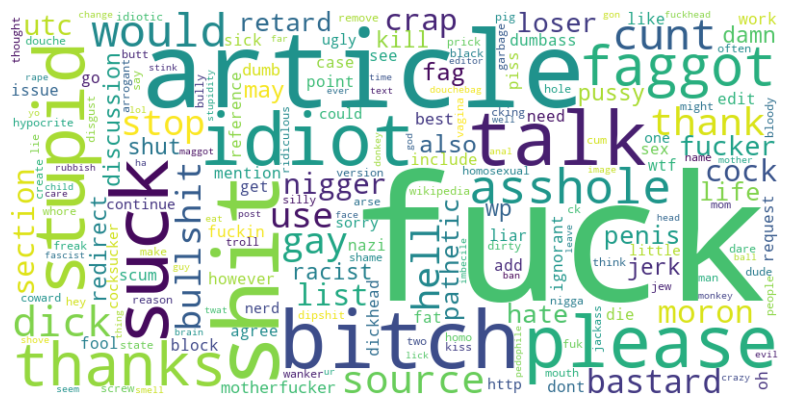

In [73]:
plt.figure(figsize=(16, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusions

* Saved, cleaned and lemmatized the data
* Implemented text vectorization using TF-IDF
* Tested three models: logistic regression, decision tree and catboost
* The catboost model turned out to be the best
* Checking the catboost model showed that the metric on the test sample meets the requirements of the project, i.e. it turned out to be at least 0.75

* Also tried to use bert to vectorize text. I had to abandon this idea due to the rather long and costly conversion